### importing libraries

In [1]:
# pip install pyxlsb

In [2]:

import numpy as np
import pandas as pd
import pyxlsb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

### loading excel file 

In [3]:
df1 = pd.read_excel(r'D:\MLprojects\finding_defaulters\Base_Problem_DataSet.xlsb')


### converting excel file to csv format

In [4]:
df1.to_csv ("Base_Problem_DataSet.csv", index = None, header=True)
# creating a copy dataframe to avoid reading excel file again and again
df = df1

### familiarizing with dataframe

In [5]:
df1

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0



rows count is 121856
column count is 39

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118249 non-null  object 
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118224 non-null  object 
 8   Borrowing_Periodic_Payment                  117044 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [7]:
df.describe()

,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Rating_Origin_1,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [8]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,5
1,float64,15
2,object,19


### Data Cleaning

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
Patron_Salary - 3%
Automobile_Possession - 3%
Two-Wheeler_Ownership - 3%
Ongoing_Borrowing - 3%
Residence_Proprietorship - 3%
Offspring_Number - 3%
Loan_Capital - 3%
Borrowing_Periodic_Payment - 4%
Customer_Revenue_Category - 3%
Patron_Academic_Qualification - 3%
Customer_Conjugal_State - 3%
Patron_Sex - 2%
Borrowing_Agreement_Category - 3%
Customer_Living_Arrangement - 3%
Population_Fraction_by_Region - 4%
Elderliness_in_Days - 3%
Work_Duration_in_Days - 3%
Enlistment_Period_in_Days - 3%
Identity_Age_in_Days - 5%
Private_Dwelling_Duration - 66%
Cellphone_Marker - 0%
Residential_Phone_Marker - 0%
Employment_Phone_Operation - 0%
Customer_Vocation - 34%
Patron_Kin_Count - 2%
Customer_Urban_Area_Ranking - 2%
Request_Submission_Day - 2%
Request_Submission_Hour - 3%
Patron_Constant_Correspondence_Marker - 0%
Customer_Professional_Communication_Marker - 0%
Sort_of_Institution - 3%
Rating_Origin_1 - 56%
Rating_Origin_2 - 5%
Rating_Origin_3 - 22%
Community_Non-Payment_Incidence - 51%
T

<Axes: >

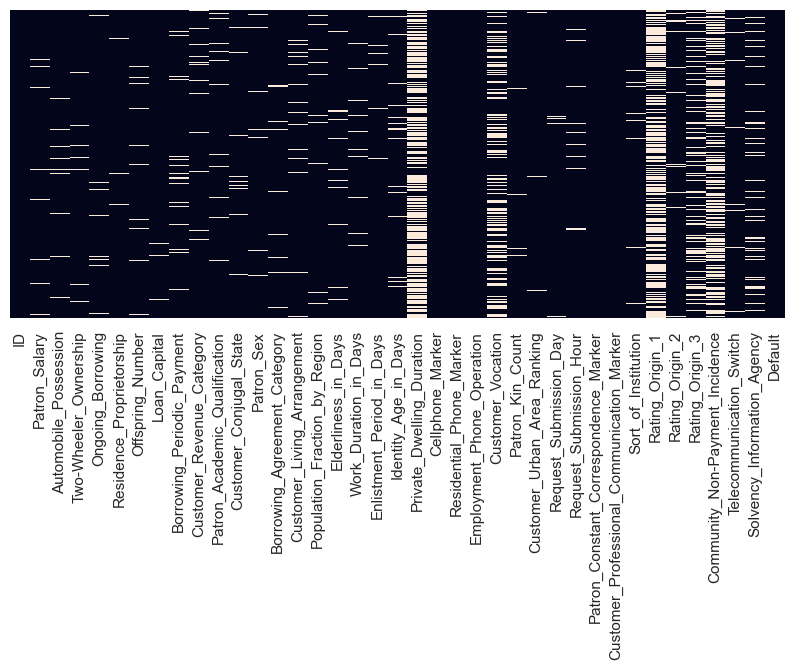

In [10]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
# converting objects into numeric values
arr_convert = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Enlistment_Period_in_Days', 
               'Identity_Age_in_Days','Work_Duration_in_Days', 'Private_Dwelling_Duration', 'Rating_Origin_3']
for ix in arr_convert:
    df[ix] = pd.to_numeric(df[ix], errors = 'coerce')
df.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,5
1,float64,22
2,object,12


In [12]:
# removing duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(121856, 39)

### deleting unrelevant features

In [13]:


drop_cols = ['ID','Request_Submission_Day', 'Request_Submission_Hour', 'Private_Dwelling_Duration', 'Customer_Vocation',
             'Telecommunication_Switch', 'Population_Fraction_by_Region','Rating_Origin_1', 'Residential_Phone_Marker', 
             'Employment_Phone_Operation']

df.drop(columns = drop_cols, axis = 1, inplace= True)


In [14]:
# Remove Duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(118220, 29)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118220 entries, 0 to 121855
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Patron_Salary                               114600 non-null  float64
 1   Automobile_Possession                       114644 non-null  float64
 2   Two-Wheeler_Ownership                       114601 non-null  float64
 3   Ongoing_Borrowing                           114588 non-null  float64
 4   Residence_Proprietorship                    114561 non-null  float64
 5   Offspring_Number                            114585 non-null  float64
 6   Loan_Capital                                114584 non-null  float64
 7   Borrowing_Periodic_Payment                  113399 non-null  float64
 8   Customer_Revenue_Category                   114524 non-null  object 
 9   Patron_Academic_Qualification               114579 non-null  object 
 10  C

In [16]:
df1 = df.corr(numeric_only = True)


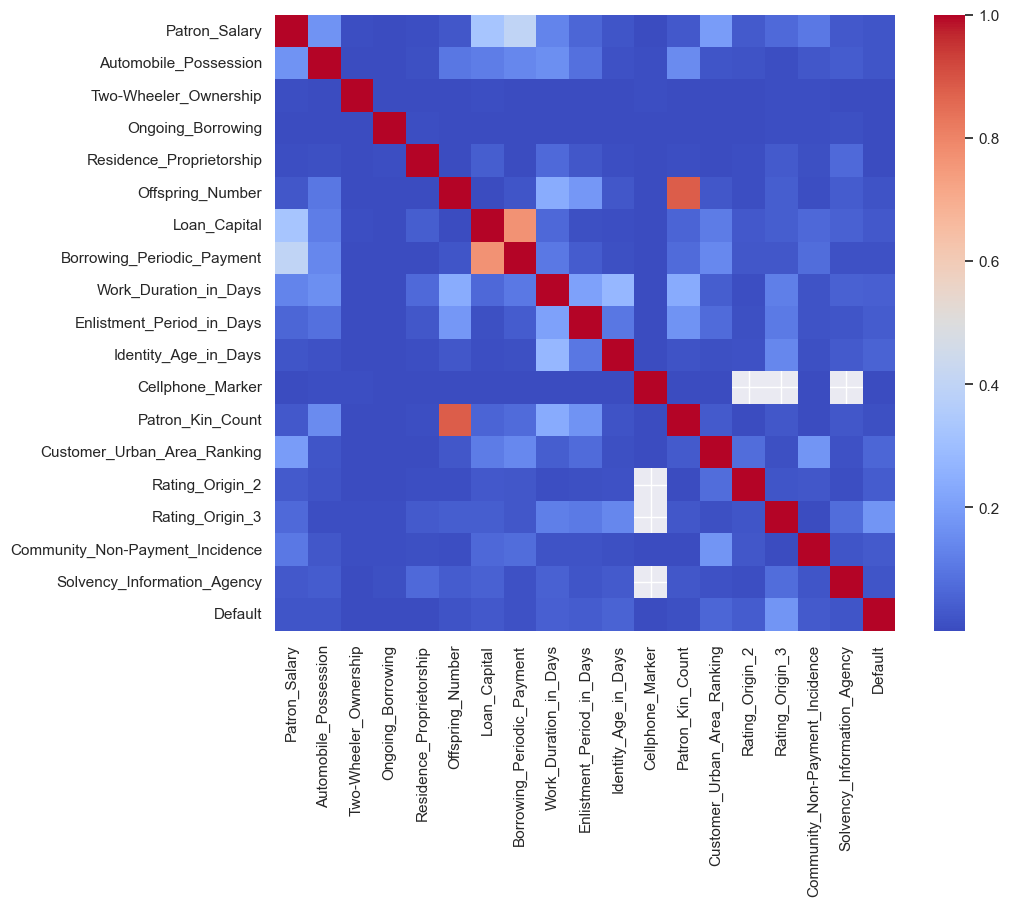

In [18]:
plt.figure(figsize = (10, 8))
dataplot = sns.heatmap(df1.abs(),annot=False, cmap="coolwarm") 

plt.show() 

### Analysis Features (one by one)

#### 1. Patron_Salary


In [19]:
corr = df['Patron_Salary'].corr(df["Default"])
corr

-0.02108462966290327

Negatively corelated


In [20]:
# Removing null values on Patron_Salary Feature
df.dropna(subset=['Patron_Salary'], inplace=True)


In [21]:
# handled outliers on Patron_Salary with z-score
from scipy import stats
z_scores = abs(stats.zscore(df['Patron_Salary']))
threshold = 2
df = df[(z_scores < threshold)]



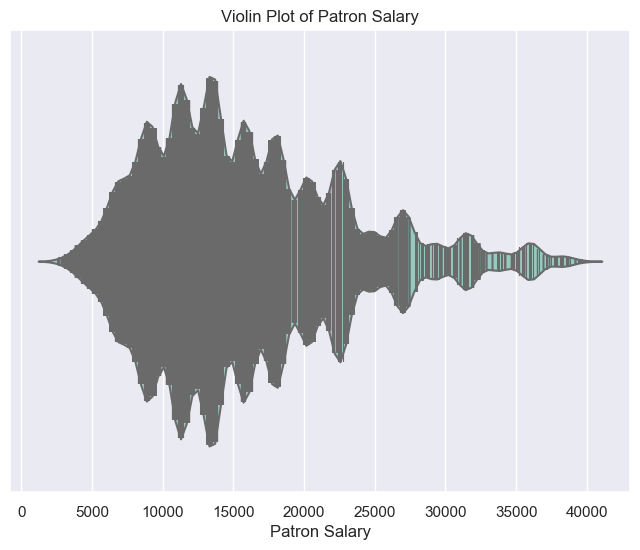

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Patron_Salary'], inner="stick", palette="Set3")

plt.xlabel("Patron Salary")
plt.title("Violin Plot of Patron Salary")

plt.show()

Most of the people have a salary of less than 20k need loans


<Axes: xlabel='Default', ylabel='Patron_Salary'>

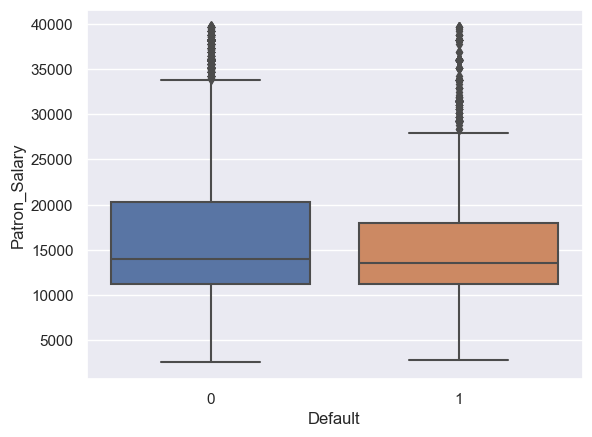

In [23]:
sns.boxplot(y = 'Patron_Salary',x = 'Default', data = df)

In [24]:
df["Patron_Salary"].describe()

count    111551.000000
mean      15837.233455
std        6981.101311
min        2565.000000
25%       11250.000000
50%       13950.000000
75%       20250.000000
max       39692.250000
Name: Patron_Salary, dtype: float64

Most of the people are in the range of 11k and 18k


#### 2. Automobile_Possession

In [25]:
corr = df['Automobile_Possession'].corr(df["Default"])
corr

-0.02167597334033665

Negative correlation

In [26]:
df["Automobile_Possession"].value_counts()

Automobile_Possession
0.0    71885
1.0    36290
Name: count, dtype: int64

<Axes: xlabel='Automobile_Possession', ylabel='Default'>

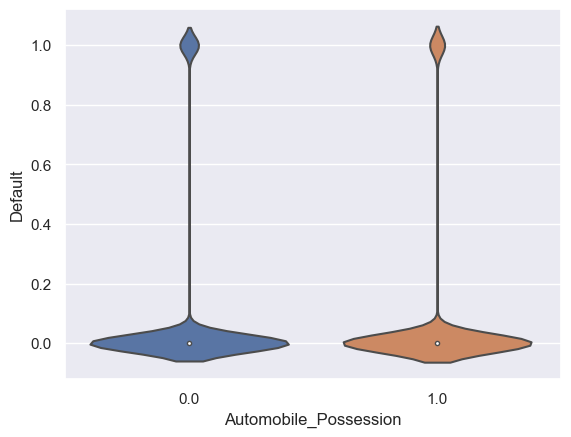

In [27]:
sns.violinplot(data = df, x ='Automobile_Possession', y = 'Default' )

Chances for becoming a default is same for both.

Majority of people who applied for loan do not have vehicles. 

#### 3.  Two-Wheeler_Ownership

In [28]:
corr = df['Two-Wheeler_Ownership'].corr(df["Default"])
corr

6.372703001170672e-05


Its also negatively corelated.

In [29]:
df["Two-Wheeler_Ownership"].value_counts()

Two-Wheeler_Ownership
0.0    72202
1.0    35937
Name: count, dtype: int64

<Axes: xlabel='Default', ylabel='Two-Wheeler_Ownership'>

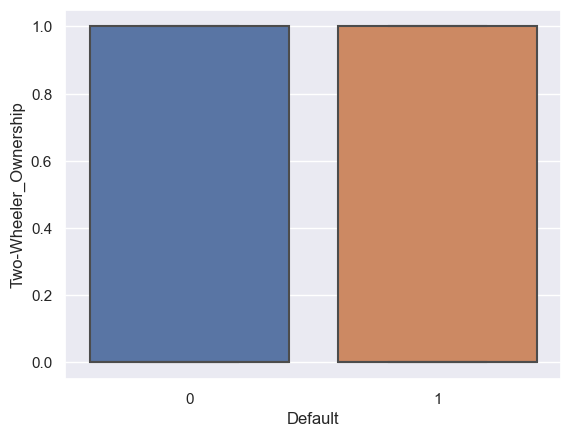

In [30]:
sns.boxplot(x='Default',y='Two-Wheeler_Ownership',data=df)

Both the feature Two-Wheeler_Ownership and Automobile_Possession have same weightage, almost same number of ownership.

#### 4.Ongoing borrowings

In [31]:
corr = df['Ongoing_Borrowing'].corr(df["Default"])
corr

0.0008674260754397702

positively corelated

In [32]:
df["Ongoing_Borrowing"].value_counts()

Ongoing_Borrowing
0.0    54091
1.0    53997
Name: count, dtype: int64

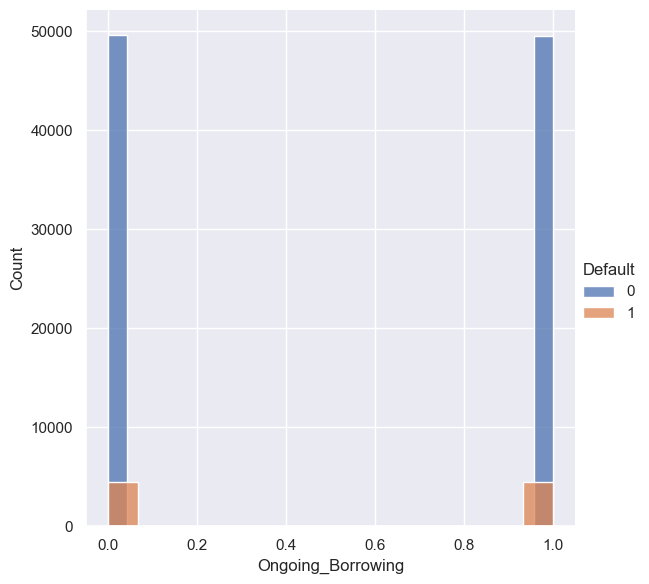

In [33]:
fg = sns.FacetGrid(df, hue='Default', height = 6)
fg.map(sns.histplot, "Ongoing_Borrowing").add_legend()
plt.show()
    

on this dataset same number of people has ongoing borrowings and without borrowings

#### 5. Residence_Proprietorship

In [34]:
corr = df['Residence_Proprietorship'].corr(df["Default"])
corr

-0.001807614268969657

Negatively corelated

In [35]:
df["Residence_Proprietorship"].value_counts()

Residence_Proprietorship
1.0    74830
0.0    33258
Name: count, dtype: int64

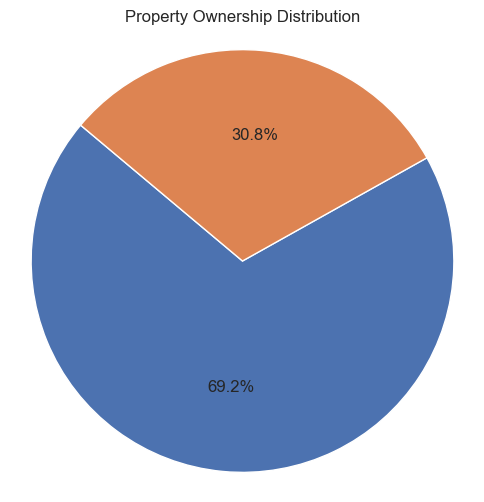

In [36]:
counts = df['Residence_Proprietorship'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')  
sns.color_palette('pastel')  

# Plot the pie chart
plt.pie(counts,  autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Property Ownership Distribution')

# Show the pie chart
plt.axis('equal') 
plt.show()

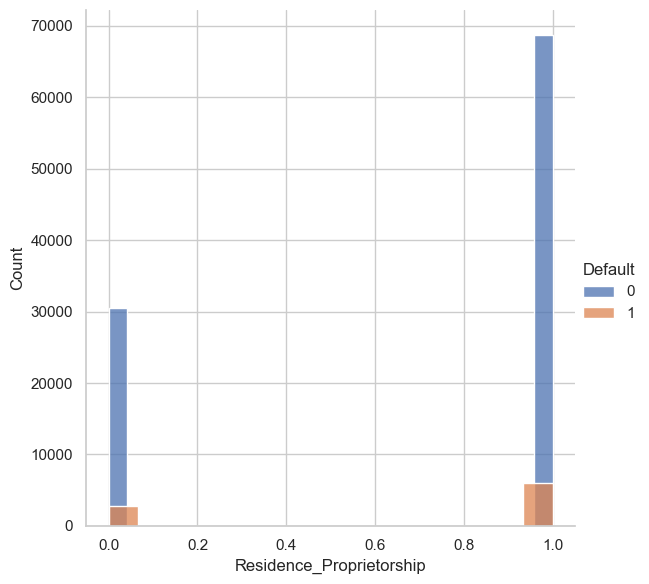

In [37]:
fg = sns.FacetGrid(df, hue='Default', height = 6)
fg.map(sns.histplot, "Residence_Proprietorship").add_legend()
plt.show()

People who have residential propert also become defaulters..

#### 6.Offspring_Number

In [38]:
corr = df['Offspring_Number'].corr(df["Default"])
corr

0.01887636158162553

Positively corelated

In [39]:
df["Offspring_Number"].describe()

count    108109.000000
mean          0.415322
std           0.725828
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: Offspring_Number, dtype: float64

In [40]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Offspring_Number'] >= y_axis_range[0]) & (df['Offspring_Number'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Offspring_Number'].quantile(0.25)
Q3 = filtered_data['Offspring_Number'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Offspring_Number'] >= lower_bound) & (filtered_data['Offspring_Number'] <= upper_bound)]
df = filtered_data
df["Offspring_Number"].describe()

count    108052.000000
mean          0.412089
std           0.709214
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: Offspring_Number, dtype: float64

<Axes: xlabel='Offspring_Number'>

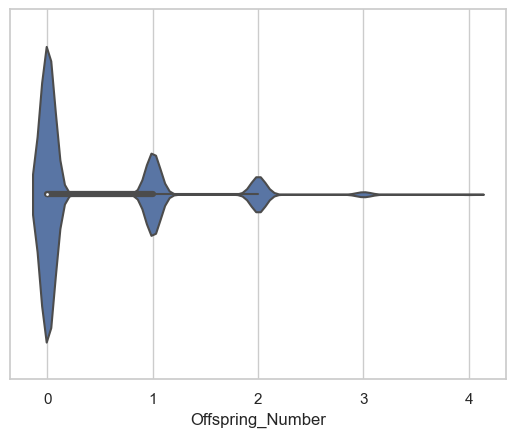

In [41]:
# plt.scatter(df.index, df['Offspring_Number'])
# sns.histplot(x='Offspring_Number', data=df);
# sns.boxplot(x=  df['Offspring_Number'])
sns.violinplot(x=df['Offspring_Number'])
# plt.pie(df, labels=df['Offspring_Number'], autopct="%.0f%%");

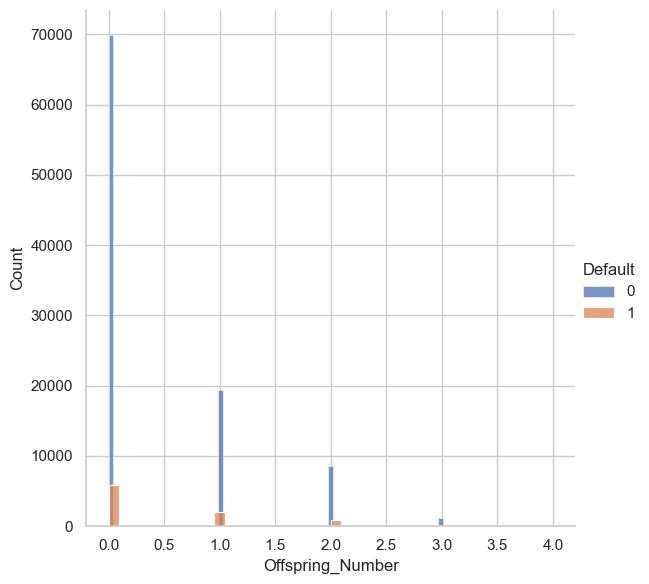

In [42]:
# sns.relplot(x="Default", y="Offspring_Number", data=df);
# sns.catplot(x="Default", y="Offspring_Number", data=df);
fg = sns.FacetGrid(df, hue='Default', height = 6)
fg.map(sns.histplot, "Offspring_Number").add_legend()
plt.show()

if Offspring_Number increases become defaulters decreases...
most of the people does not have Offspring...


#### 7. Loan_Capital

In [43]:
corr = df['Loan_Capital'].corr(df["Default"])
corr

-0.0265349144011609

Negatively corelated

In [44]:
df["Loan_Capital"].describe()

count    104719.000000
mean      58791.243503
std       39047.212657
min        4500.000000
25%       27000.000000
50%       50849.550000
75%       80865.000000
max      386001.900000
Name: Loan_Capital, dtype: float64

In [45]:
# handled outliers on Loan_Capital with z-score
print(df["Loan_Capital"])


0          61190.55
1          15282.00
2          59527.35
3          53870.40
4         133988.40
            ...    
121851    107820.00
121852    104256.00
121853     55107.90
121854     45000.00
121855     62428.95
Name: Loan_Capital, Length: 108052, dtype: float64


<Axes: >

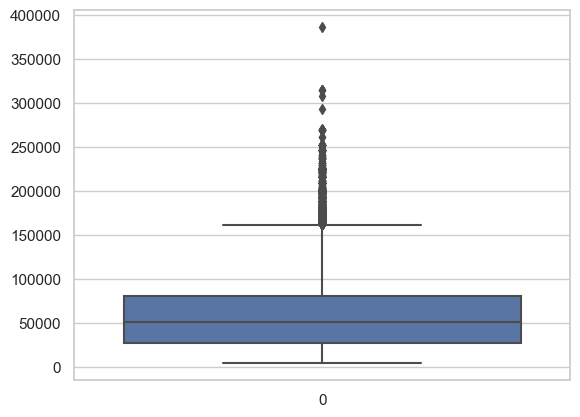

In [46]:
sns.boxplot(df["Loan_Capital"])

In [47]:
# Handling outliers

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Loan_Capital'] >= y_axis_range[0]) & (df['Loan_Capital'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Loan_Capital'].quantile(0.25)
Q3 = filtered_data['Loan_Capital'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Loan_Capital'] >= lower_bound) & (filtered_data['Loan_Capital'] <= upper_bound)]
df = filtered_data
df["Loan_Capital"].describe()

count    88410.000000
mean     45754.403307
std      23928.565062
min       4500.000000
25%      25470.000000
50%      45000.000000
75%      64692.000000
max      99988.650000
Name: Loan_Capital, dtype: float64

In [48]:
df.dropna(subset=['Loan_Capital'], inplace=True)

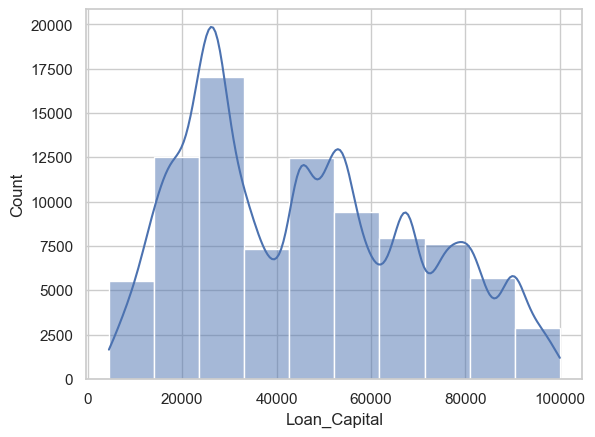

In [49]:
sns.histplot(df['Loan_Capital'], kde=True, bins=10);

<Axes: xlabel='Loan_Capital', ylabel='Count'>

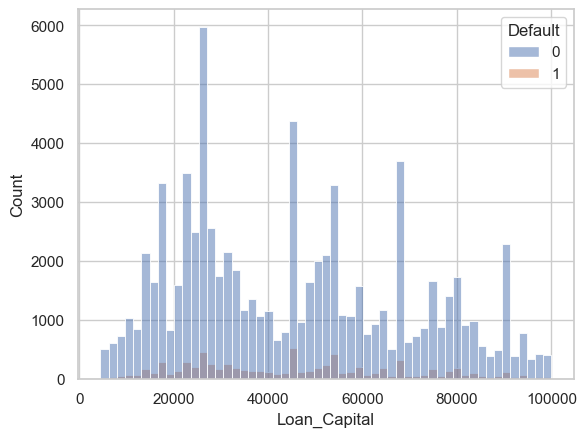

In [50]:
# sns.relplot(x="Loan_Capital", y="Default",  data=df);
sns.histplot(x='Loan_Capital',data=df,hue=df['Default']) 

It looks like all loans are not unique. The certain amount appears several times. It may be the reason; the company has some range or a certain amount to lend.

#### 8. Borrowing_Periodic_Payment

In [51]:
corr = df['Borrowing_Periodic_Payment'].corr(df["Default"])
corr

0.02285351102996106

Positively corelated

<Axes: >

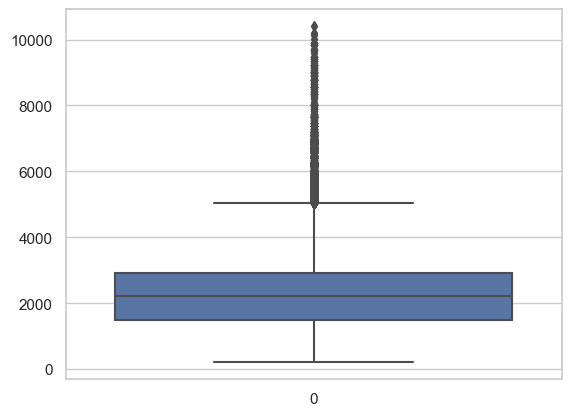

In [52]:
sns.boxplot(df["Borrowing_Periodic_Payment"])

In [53]:
y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Borrowing_Periodic_Payment'] >= y_axis_range[0]) & (df['Borrowing_Periodic_Payment'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Borrowing_Periodic_Payment'].quantile(0.25)
Q3 = filtered_data['Borrowing_Periodic_Payment'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Borrowing_Periodic_Payment'] >= lower_bound) & (filtered_data['Borrowing_Periodic_Payment'] <= upper_bound)]
df = filtered_data
df["Borrowing_Periodic_Payment"].describe()

count    84562.000000
mean      2322.576126
std       1091.090732
min        217.350000
25%       1503.450000
50%       2208.600000
75%       2908.350000
max       7145.550000
Name: Borrowing_Periodic_Payment, dtype: float64

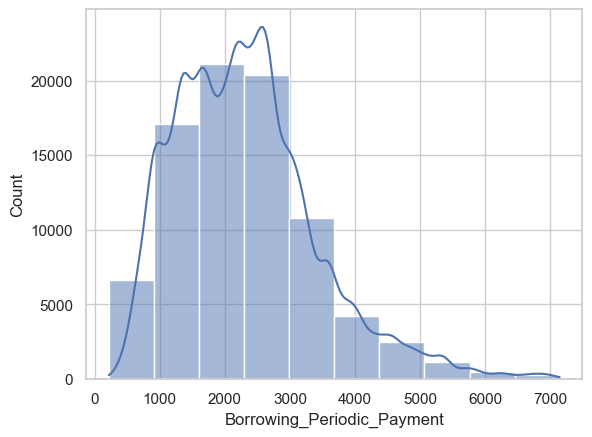

In [54]:
sns.histplot(df['Borrowing_Periodic_Payment'], kde=True, bins=10);

<Axes: xlabel='Borrowing_Periodic_Payment', ylabel='Count'>

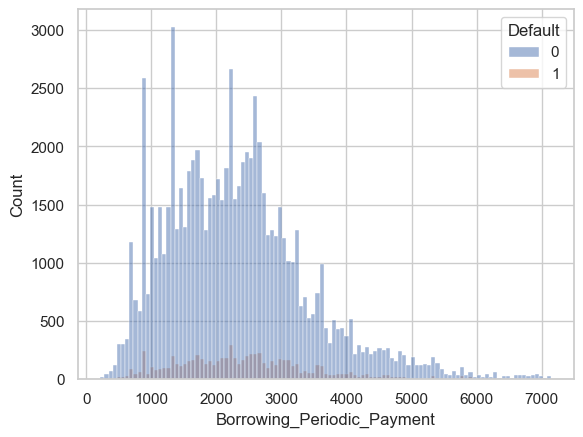

In [55]:
sns.histplot(data=df, x="Borrowing_Periodic_Payment", hue="Default")

Most defaults have occurred in the periodic payment range of 1500 to 3000

#### Customer_Revenue_Category

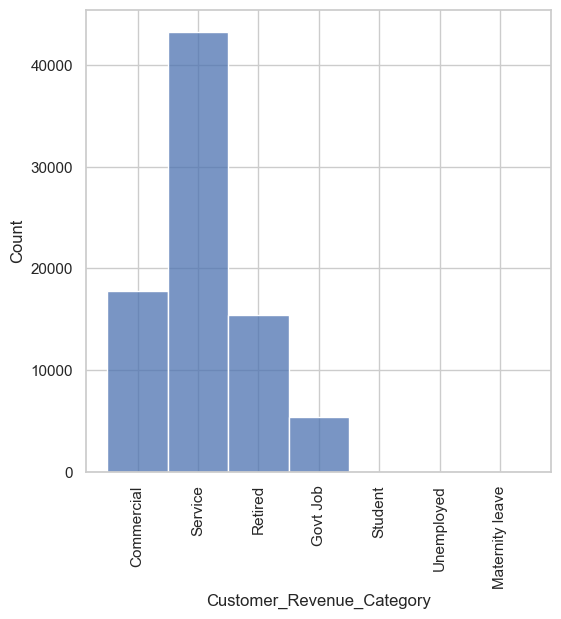

In [56]:
x = df['Customer_Revenue_Category'].value_counts() 
plt.figure(figsize=(6, 6))

sns.histplot(df['Customer_Revenue_Category'],  bins=10);
plt.xticks(rotation=90)
plt.show() 

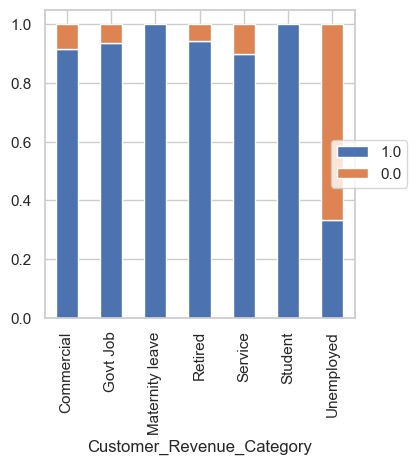

In [57]:
col_name=pd.crosstab(df['Customer_Revenue_Category'],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

plt.show()

In [58]:
df.dropna(subset=['Customer_Revenue_Category'], inplace=True)

Customers in higher revenue categories show lower default rates, illustrating the link between income and loan repayment ability.

#### Patron_Academic_Qualification

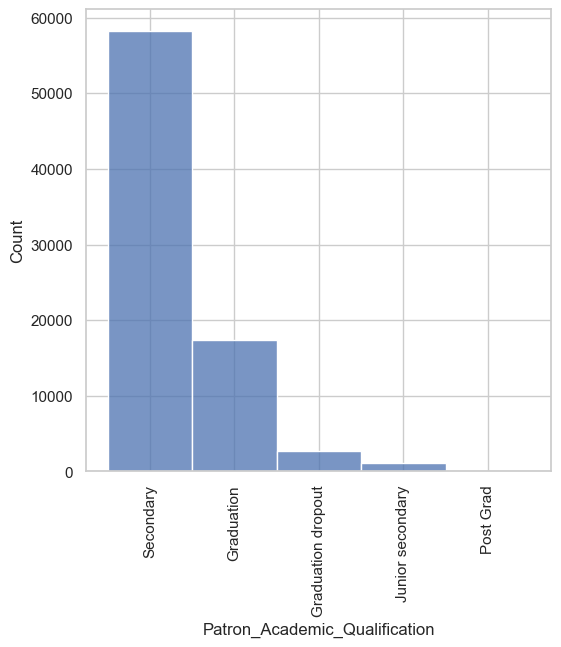

In [59]:
x = df['Patron_Academic_Qualification'].value_counts() 
plt.figure(figsize=(6, 6))

sns.histplot(df['Patron_Academic_Qualification'],  bins=10);
plt.xticks(rotation=90)
plt.show() 

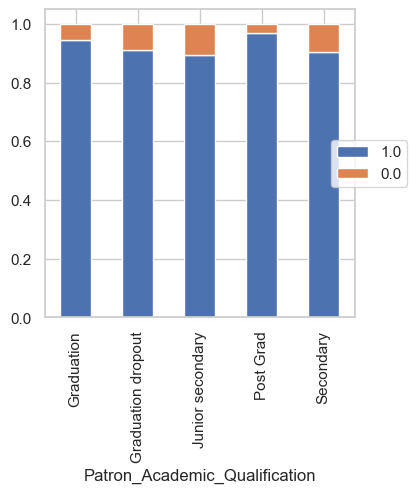

In [60]:
col_name=pd.crosstab(df['Patron_Academic_Qualification'],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

plt.show()

Education and defaulters are inversely proportional, if education increases chances for default decreases

#### Borrowing_Agreement_Category

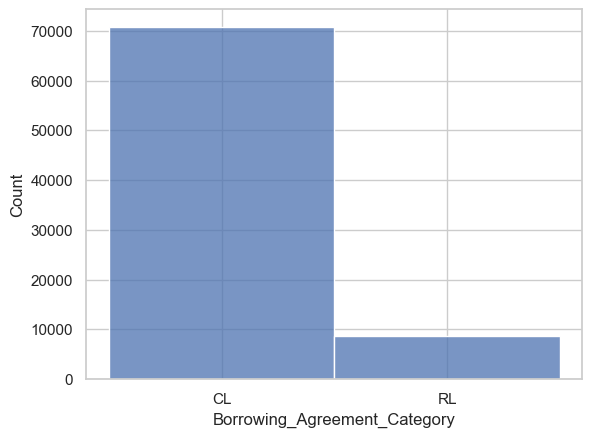

In [61]:
# plt.hist(df['Borrowing_Agreement_Category'])

sns.histplot(df['Borrowing_Agreement_Category'],  bins=10);

<Axes: xlabel='Borrowing_Agreement_Category', ylabel='Count'>

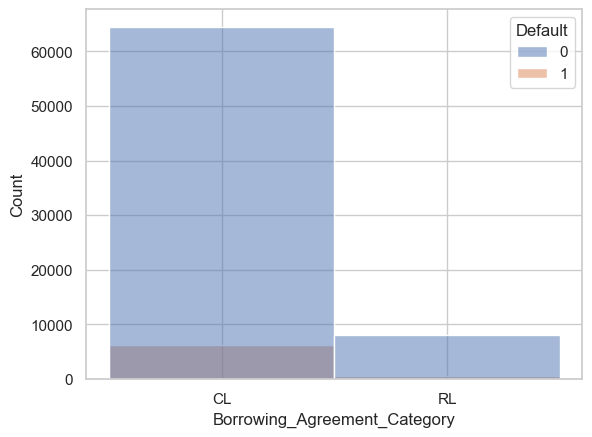

In [62]:
sns.histplot(x='Borrowing_Agreement_Category',data=df,hue=df['Default'])

chances for getting default are higher for CL

#### Customer_Living_Arrangement 

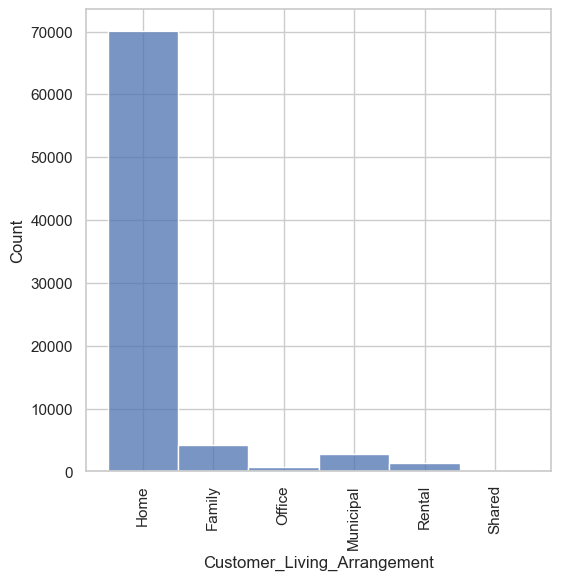

In [64]:
x = df['Customer_Living_Arrangement'].value_counts() 
plt.figure(figsize=(6, 6))

sns.histplot(df['Customer_Living_Arrangement'],  bins=10);
plt.xticks(rotation=90)
plt.show() 

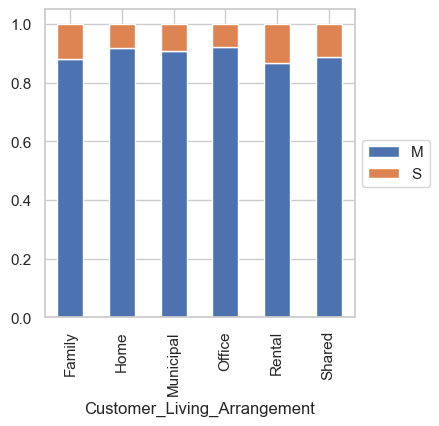

In [86]:
col_name=pd.crosstab(df['Customer_Living_Arrangement'],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [66]:
# imputing by using mean
df['Customer_Living_Arrangement'].fillna(df['Customer_Living_Arrangement'].mode()[0], inplace=True)
null_count = df['Customer_Living_Arrangement'].isnull().sum()

Person who lives in rental has greater chance for being defaulter

#### Elderliness_in_Days 

In [67]:
df["Elderliness_in_Days"].describe()

count     79403
unique    16730
top       10936
freq         17
Name: Elderliness_in_Days, dtype: int64

In [68]:
df["Elderliness_in_Days"]= pd.to_numeric(df["Elderliness_in_Days"], errors='coerce')

In [69]:
df["Elderliness_in_Days"].describe()


count    79391.000000
mean     15953.635450
std       4481.318521
min       7676.000000
25%      12146.000000
50%      15600.000000
75%      19711.000000
max      25201.000000
Name: Elderliness_in_Days, dtype: float64

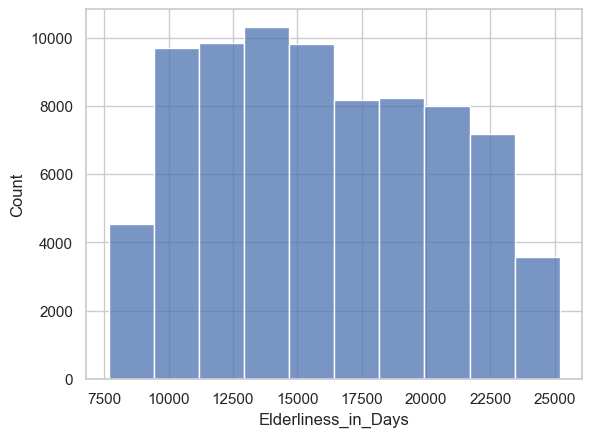

In [70]:
sns.histplot(df['Elderliness_in_Days'], bins=10);

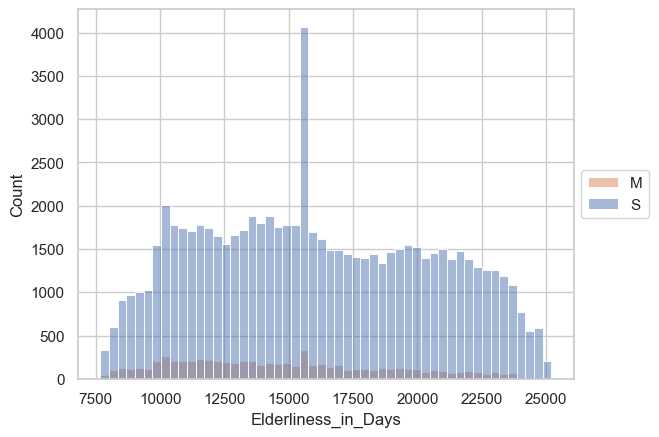

In [87]:
sns.histplot(data=df, x="Elderliness_in_Days", hue="Default")
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

<Axes: xlabel='Default', ylabel='Elderliness_in_Days'>

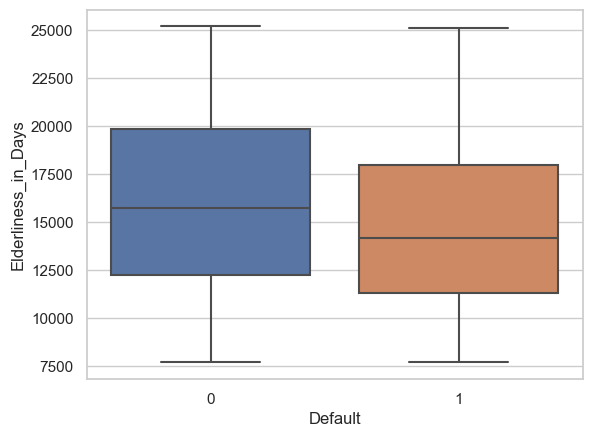

In [72]:
sns.boxplot(y = 'Elderliness_in_Days',x = 'Default', data = df)

In [73]:
    med = df['Elderliness_in_Days'].median()
    df['Elderliness_in_Days'] = df['Elderliness_in_Days'].fillna(med)
  

##### Customer_Conjugal_State

([<matplotlib.patches.Wedge at 0x158958a3c90>,
 [Text(0.008131925767223875, -1.0999699413089963, 'M'),
  Text(0.3994936067296912, 1.024892608121506, 'S'),
  Text(-0.3461257105760863, 1.0441249889156947, 'D'),
  Text(-0.7079369473625848, 0.8419176198173697, 'W')],
 [Text(0.004435595873031203, -0.5999836043503615, '72.5%'),
  Text(0.21790560367074063, 0.5590323317026396, '15.5%'),
  Text(-0.18879584213241069, 0.5695227212267425, '6.5%'),
  Text(-0.38614742583413714, 0.4592277926276561, '5.5%')])

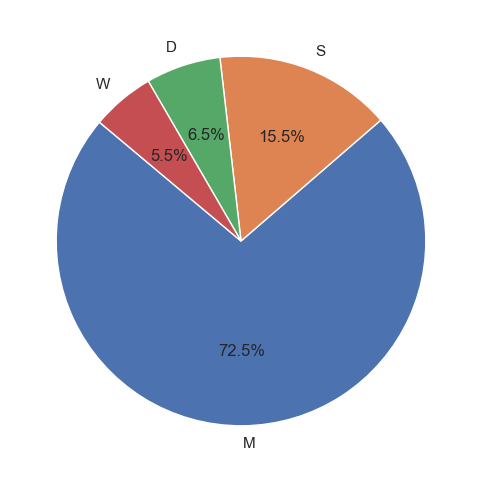

In [92]:
counts = df['Customer_Conjugal_State'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')  # Optional: Set the style
sns.color_palette('pastel') 


plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

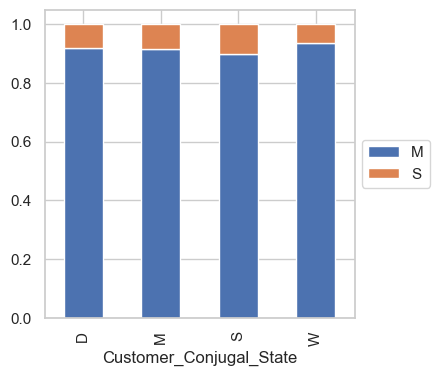

In [85]:
# sns.boxplot(y = 'Default',x = 'Customer_Conjugal_State', data = df)
col_name=pd.crosstab(df['Customer_Conjugal_State'],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [89]:
# imputing null with mode

df['Customer_Conjugal_State'].fillna(df['Customer_Conjugal_State'].mode()[0], inplace=True)
null_count = df['Customer_Conjugal_State'].isnull().sum()

Singles are becoming defaulters

##### Patron_Sex

([<matplotlib.patches.Wedge at 0x1590cb83810>,
 [Text(-0.1968637411837564, -1.082240577416655, 'Male'),
  Text(0.19699080347786654, 1.0822174565886213, 'Female'),
  Text(-0.8425659096234501, 0.7071652479727834, 'XNA')],
 [Text(-0.10738022246386712, -0.5903130422272663, '66.5%'),
  Text(0.10744952916974537, 0.5903004308665207, '33.5%'),
  Text(-0.4595814052491546, 0.38572649889424543, '0.0%')])

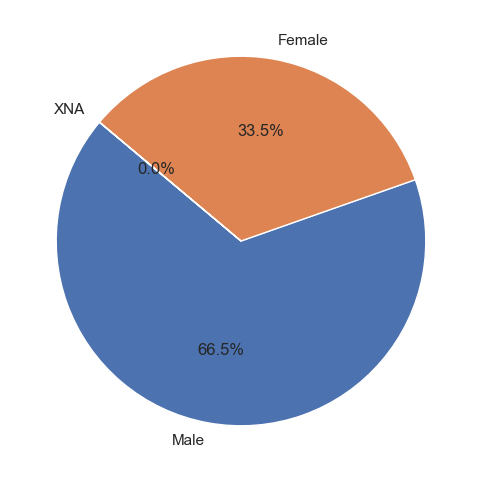

In [93]:
counts = df['Patron_Sex'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')  # Optional: Set the style
sns.color_palette('pastel') 


plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

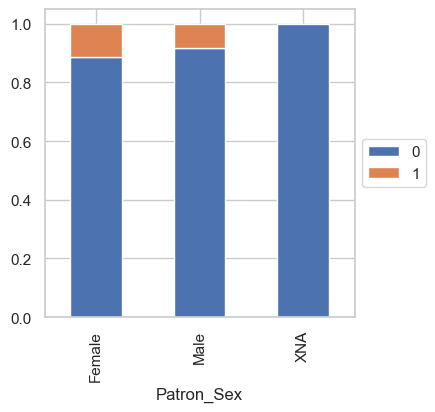

In [148]:
col_name=pd.crosstab(df['Patron_Sex'],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.legend( loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Female has more chances of getting default...


##### Work_Duration_in_Days

In [100]:
corr = df['Work_Duration_in_Days'].corr(df["Default"])
corr

-0.05246315900008409

Negatively corelated

In [103]:
df["Work_Duration_in_Days"]

0           1062.0
1           4129.0
2           5102.0
3         365243.0
5           1184.0
            ...   
121849       763.0
121850    365243.0
121853      1623.0
121854       847.0
121855       498.0
Name: Work_Duration_in_Days, Length: 81899, dtype: float64

In [104]:
y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Work_Duration_in_Days'] >= y_axis_range[0]) & (df['Work_Duration_in_Days'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Work_Duration_in_Days'].quantile(0.25)
Q3 = filtered_data['Work_Duration_in_Days'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Work_Duration_in_Days'] >= lower_bound) & (filtered_data['Work_Duration_in_Days'] <= upper_bound)]
df = filtered_data
df["Work_Duration_in_Days"].describe()

count    63310.000000
mean      2142.131385
std       1936.244201
min          0.000000
25%        726.000000
50%       1546.000000
75%       2955.000000
max       9992.000000
Name: Work_Duration_in_Days, dtype: float64

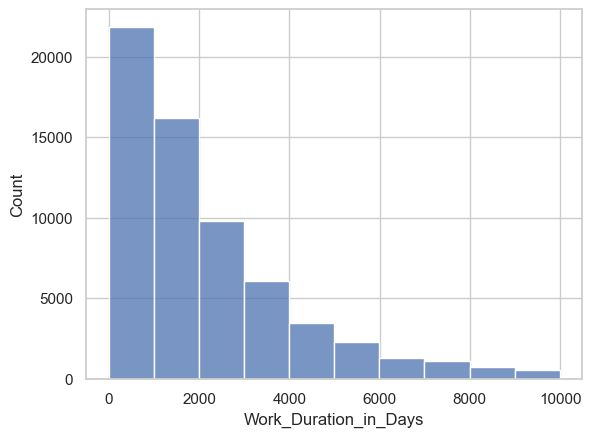

In [105]:
sns.histplot(df['Work_Duration_in_Days'], bins=10);

<Axes: xlabel='Default', ylabel='Work_Duration_in_Days'>

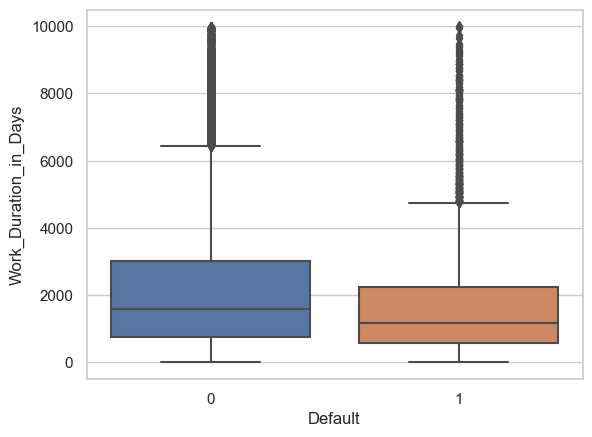

In [107]:
sns.boxplot(y = 'Work_Duration_in_Days',x = 'Default', data = df)

Chances for become is high for those who have work duration in days lower than 2.5k

In [109]:
# imputing null with mode

df['Work_Duration_in_Days'].fillna(df['Work_Duration_in_Days'].mode()[0], inplace=True)
null_count = df['Work_Duration_in_Days'].isnull().sum()

#### Enlistment_Period_in_Days

In [118]:
y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Enlistment_Period_in_Days'] >= y_axis_range[0]) & (df['Enlistment_Period_in_Days'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Enlistment_Period_in_Days'].quantile(0.25)
Q3 = filtered_data['Enlistment_Period_in_Days'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Enlistment_Period_in_Days'] >= lower_bound) & (filtered_data['Enlistment_Period_in_Days'] <= upper_bound)]
df = filtered_data
df["Enlistment_Period_in_Days"].describe()

count    61369.000000
mean      4573.149000
std       3186.785944
min          0.000000
25%       1842.000000
50%       4230.000000
75%       6842.000000
max      19488.000000
Name: Enlistment_Period_in_Days, dtype: float64

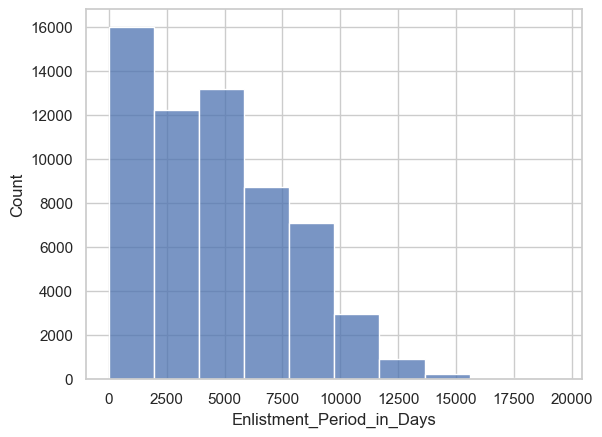

In [121]:
sns.histplot(df['Enlistment_Period_in_Days'], bins=10);

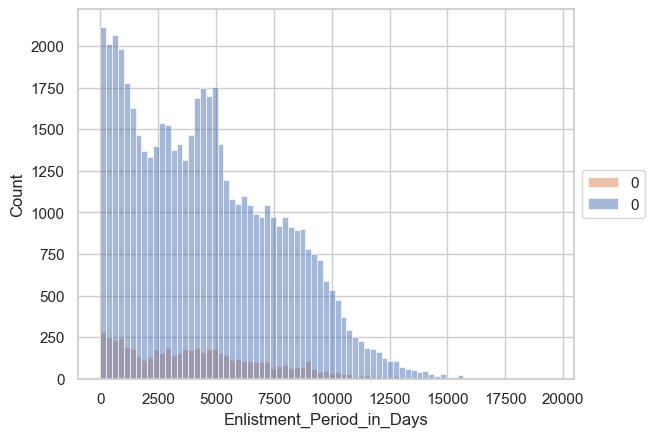

In [159]:
sns.histplot(data=df, x="Enlistment_Period_in_Days", hue="Default")
# plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.legend(df['Default'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# plt.legend()

Longer enlistment periods are linked to lower default rates, emphasizing the role of employment stability.

##### Identity_Age_in_Days

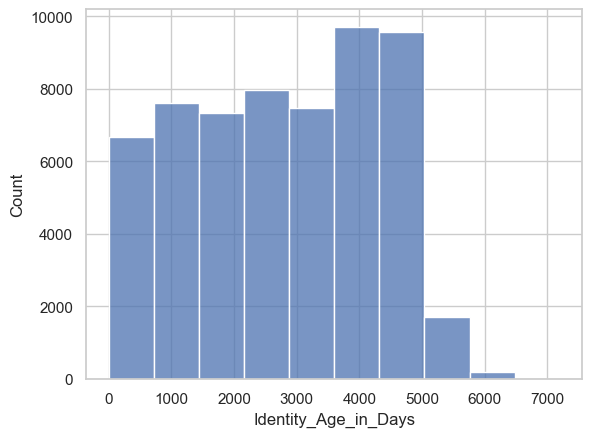

In [120]:
sns.histplot(df['Identity_Age_in_Days'], bins=10);

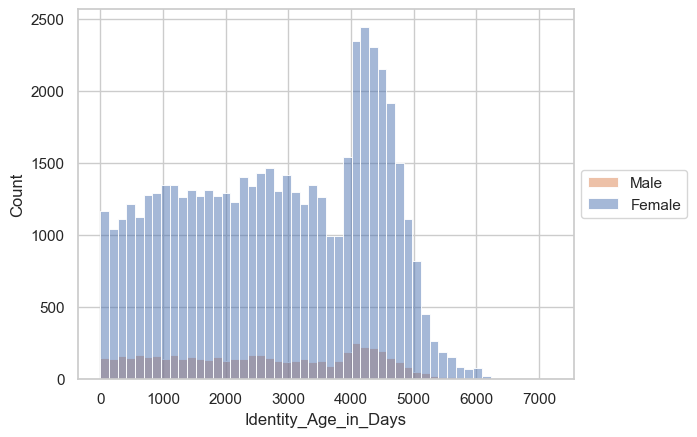

In [123]:
sns.histplot(data=df, x="Identity_Age_in_Days", hue="Default")
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

Identity age with the range of between 4000 and 5000 become default are higher

In [127]:
df['Identity_Age_in_Days'].isnull().sum()

0

In [126]:
   #imputing using median
    
med = df['Identity_Age_in_Days'].median()
df['Identity_Age_in_Days'] = df['Identity_Age_in_Days'].fillna(med)
null_value_count = df['Identity_Age_in_Days'].isnull().sum()

#### Cellphone_Marker

Its not an import feature, so removing

In [132]:
df = df.drop('Cellphone_Marker', axis=1)

##### Patron_Kin_Count

In [135]:

y_axis_range = (0, 100000)

# Filter the data to include only salary values within the defined range
filtered_data = df[(df['Patron_Kin_Count'] >= y_axis_range[0]) & (df['Patron_Kin_Count'] <= y_axis_range[1])]

# Identify and remove outliers using a custom IQR multiplier (e.g., 3.0)
Q1 = filtered_data['Patron_Kin_Count'].quantile(0.25)
Q3 = filtered_data['Patron_Kin_Count'].quantile(0.75)
IQR_multiplier = 3.0  # Customize the multiplier
lower_bound = Q1 - IQR_multiplier * (Q3 - Q1)
upper_bound = Q3 + IQR_multiplier * (Q3 - Q1)

filtered_data = filtered_data[(filtered_data['Patron_Kin_Count'] >= lower_bound) & (filtered_data['Patron_Kin_Count'] <= upper_bound)]
df = filtered_data
df["Patron_Kin_Count"].describe()

count    60089.000000
mean         2.242457
std          0.946290
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Patron_Kin_Count, dtype: float64

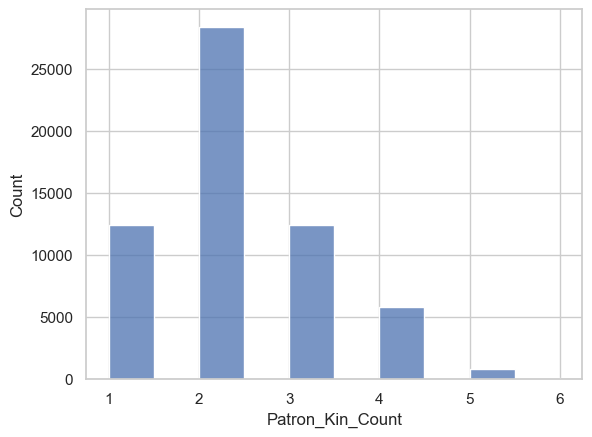

In [139]:
sns.histplot(df['Patron_Kin_Count'], bins=10);

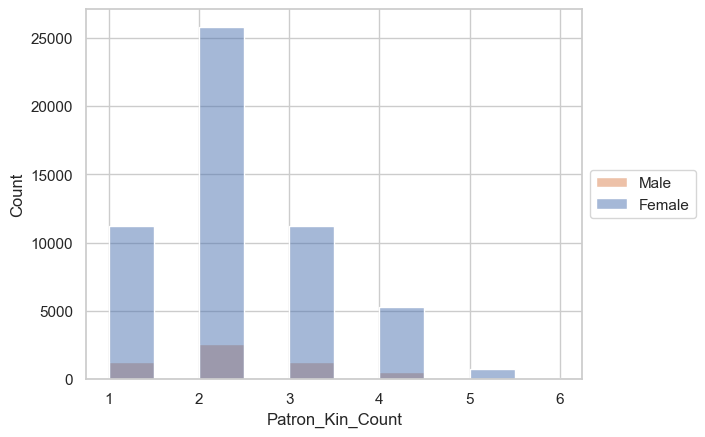

In [160]:
sns.histplot(data=df, x="Patron_Kin_Count", hue="Default", bins = 10)
plt.legend(labels=counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

Most of the familes applied for loans have 2 kids

####  Customer_Urban_Area_Ranking 

In [163]:
df['Customer_Urban_Area_Ranking'].isnull().sum()

0

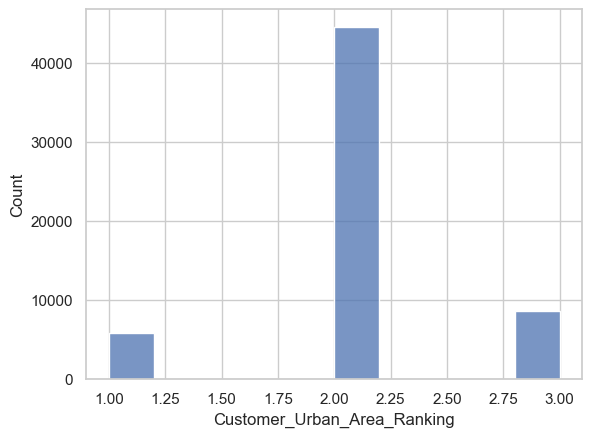

In [146]:
sns.histplot(df['Customer_Urban_Area_Ranking'], bins=10);

<Axes: xlabel='Customer_Urban_Area_Ranking', ylabel='Count'>

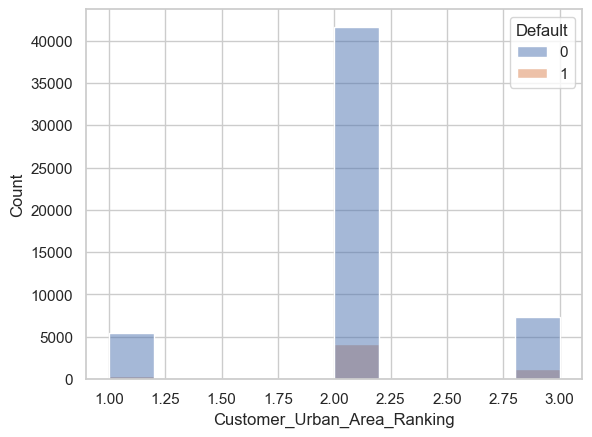

In [178]:
sns.histplot(data=df, x="Customer_Urban_Area_Ranking", hue="Default", bins = 10)


# sns.histplot(x = df['Customer_Urban_Area_Ranking'], hue = df['Default'], stat='count',
#     bins='auto', binwidth = 5, fill=True, shrink=1);

In [162]:
# imputing null with mode

df['Customer_Urban_Area_Ranking'].fillna(df['Customer_Urban_Area_Ranking'].mode()[0], inplace=True)
null_count = df['Customer_Urban_Area_Ranking'].isnull().sum()

##### Patron_Constant_Correspondence_Marker

In [173]:
df["Patron_Constant_Correspondence_Marker"].value_counts()

Patron_Constant_Correspondence_Marker
Yes    54473
No      5616
Name: count, dtype: int64

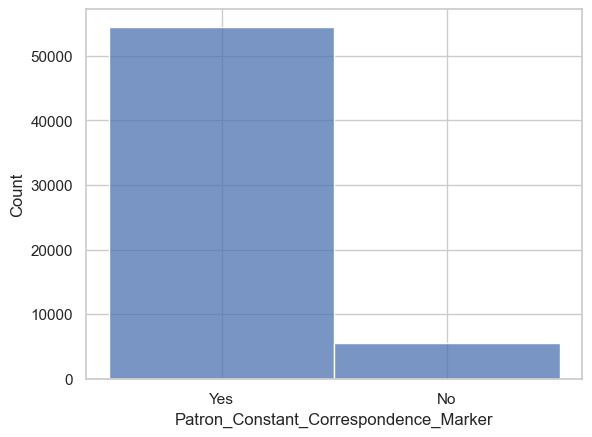

In [167]:
sns.histplot(df['Patron_Constant_Correspondence_Marker'], bins=5, binwidth = 5);

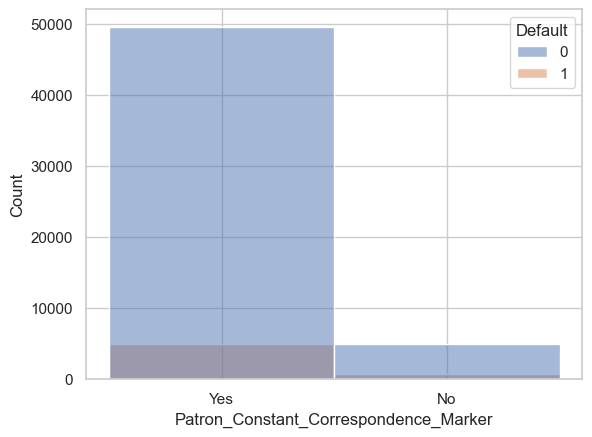

In [176]:
sns.histplot(x = df['Patron_Constant_Correspondence_Marker'], hue = df['Default'], stat='count',
    bins='auto', binwidth = 5, fill=True, shrink=1);

In [174]:
# imputing null with mode

df['Patron_Constant_Correspondence_Marker'].fillna(df['Patron_Constant_Correspondence_Marker'].mode()[0], inplace=True)
null_count = df['Patron_Constant_Correspondence_Marker'].isnull().sum()

In [175]:
df['Patron_Constant_Correspondence_Marker'].isnull().sum()

0

#### Customer_Professional_Communication_Marker 

In [179]:
# its not an important feature

df = df.drop('Customer_Professional_Communication_Marker', axis=1)

Patron_Salary - 0%
Automobile_Possession - 3%
Two-Wheeler_Ownership - 3%
Ongoing_Borrowing - 3%
Residence_Proprietorship - 3%
Offspring_Number - 0%
Loan_Capital - 0%
Borrowing_Periodic_Payment - 0%
Customer_Revenue_Category - 0%
Patron_Academic_Qualification - 3%
Customer_Conjugal_State - 0%
Patron_Sex - 2%
Borrowing_Agreement_Category - 3%
Customer_Living_Arrangement - 0%
Elderliness_in_Days - 0%
Work_Duration_in_Days - 0%
Enlistment_Period_in_Days - 0%
Identity_Age_in_Days - 0%
Patron_Kin_Count - 0%
Customer_Urban_Area_Ranking - 0%
Patron_Constant_Correspondence_Marker - 0%
Sort_of_Institution - 0%
Rating_Origin_2 - 5%
Rating_Origin_3 - 23%
Community_Non-Payment_Incidence - 52%
Solvency_Information_Agency - 16%
Default - 0%


#### Sort_of_Institution

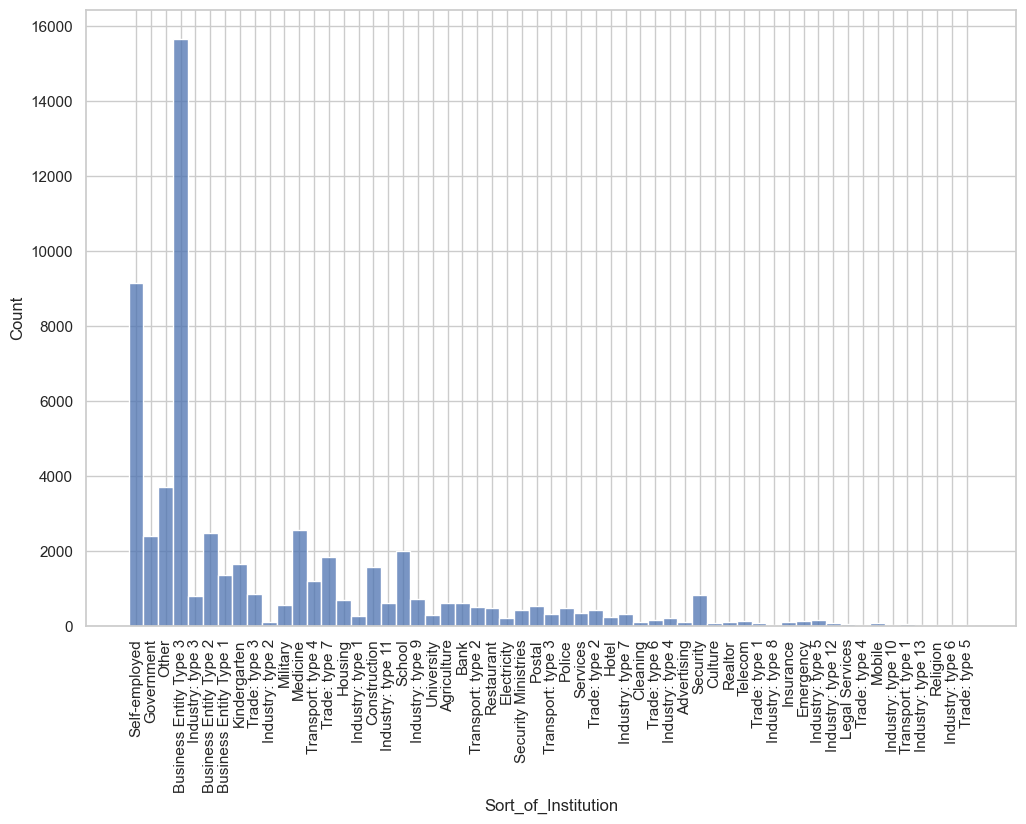

In [187]:

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(df['Sort_of_Institution'],  bins=10, ax=ax);


plt.xticks(rotation=90)
plt.show() 

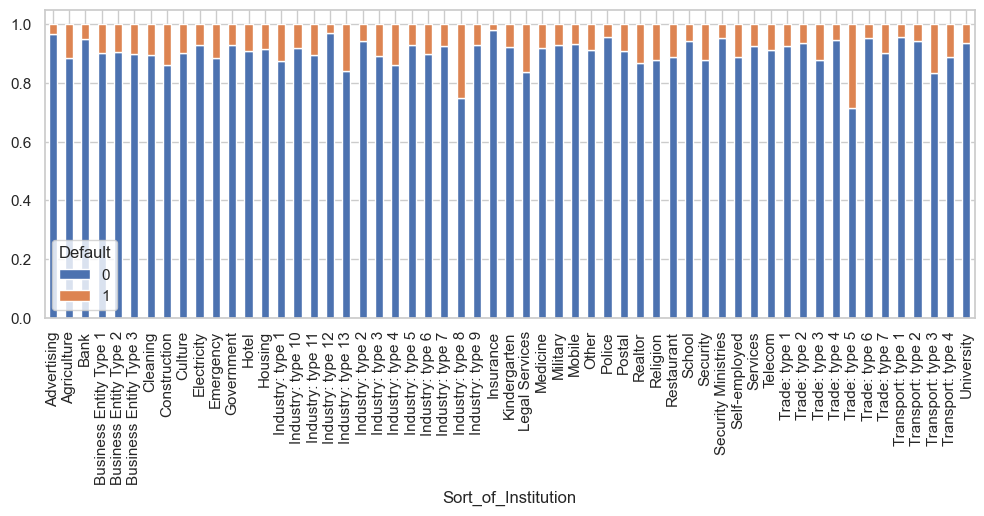

In [181]:
col_name=pd.crosstab(df["Sort_of_Institution"],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(12,4))
plt.show()

Industry type 8 and trade type 5 have shown the most percentage defaults. This data can impact the model and be included in the model building.

In [190]:
df['Sort_of_Institution'].isnull().sum()

0

In [189]:
# Removing null values on Patron_Salary Feature
df.dropna(subset=['Sort_of_Institution'], inplace=True)

In [192]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Patron_Salary - 0%
Automobile_Possession - 3%
Two-Wheeler_Ownership - 3%
Ongoing_Borrowing - 3%
Residence_Proprietorship - 3%
Offspring_Number - 0%
Loan_Capital - 0%
Borrowing_Periodic_Payment - 0%
Customer_Revenue_Category - 0%
Patron_Academic_Qualification - 3%
Customer_Conjugal_State - 0%
Patron_Sex - 2%
Borrowing_Agreement_Category - 3%
Customer_Living_Arrangement - 0%
Elderliness_in_Days - 0%
Work_Duration_in_Days - 0%
Enlistment_Period_in_Days - 0%
Identity_Age_in_Days - 0%
Patron_Kin_Count - 0%
Customer_Urban_Area_Ranking - 0%
Patron_Constant_Correspondence_Marker - 0%
Sort_of_Institution - 0%
Rating_Origin_2 - 5%
Rating_Origin_3 - 23%
Community_Non-Payment_Incidence - 52%
Solvency_Information_Agency - 16%
Default - 0%


#### Combining 2 ratings into one rating using pca

In [197]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [198]:
data = df[['Rating_Origin_2', 'Rating_Origin_3']]
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
pca = PCA(n_components=1)
combined_feature = pca.fit_transform(data_imputed)
df['Combined_Rating'] = combined_feature


In [201]:
df['Combined_Rating']

0        -0.030327
1        -0.294041
5         0.188363
8         0.128827
10        0.262592
            ...   
121848    0.114956
121849    0.111925
121853   -0.461028
121854   -0.408079
121855    0.046119
Name: Combined_Rating, Length: 58282, dtype: float64

In [199]:
    # removing ['Rating_Origin_2', 'Rating_Origin_3']
df = df.drop(['Rating_Origin_2', 'Rating_Origin_3'], axis=1)

In [204]:
# changing position of default and combined_rating
columns = df.columns.tolist()
last_column = columns.pop()
position_to_insert = -1 
columns.insert(position_to_insert, last_column)
df = df[columns]


#### Community_Non-Payment_Incidence

In [209]:
df['Community_Non-Payment_Incidence'].info()

<class 'pandas.core.series.Series'>
Index: 58282 entries, 0 to 121855
Series name: Community_Non-Payment_Incidence
Non-Null Count  Dtype  
--------------  -----  
27896 non-null  float64
dtypes: float64(1)
memory usage: 910.7 KB


In [211]:
# more than 50% are null values so deleting feature
df = df.drop('Community_Non-Payment_Incidence', axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 58282 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Patron_Salary                          58282 non-null  float64
 1   Automobile_Possession                  56507 non-null  float64
 2   Two-Wheeler_Ownership                  56439 non-null  float64
 3   Ongoing_Borrowing                      56436 non-null  float64
 4   Residence_Proprietorship               56417 non-null  float64
 5   Offspring_Number                       58282 non-null  float64
 6   Loan_Capital                           58282 non-null  float64
 7   Borrowing_Periodic_Payment             58282 non-null  float64
 8   Customer_Revenue_Category              58282 non-null  object 
 9   Patron_Academic_Qualification          56437 non-null  object 
 10  Customer_Conjugal_State                58282 non-null  object 
 11  Patron

#### Solvency_Information_Agency            

In [216]:
df['Solvency_Information_Agency'].isnull().sum()

0

In [213]:
#null value is very less so imputing using mode
# imputing null with mode

df['Solvency_Information_Agency'].fillna(df['Solvency_Information_Agency'].mode()[0], inplace=True)
null_count = df['Solvency_Information_Agency'].isnull().sum()

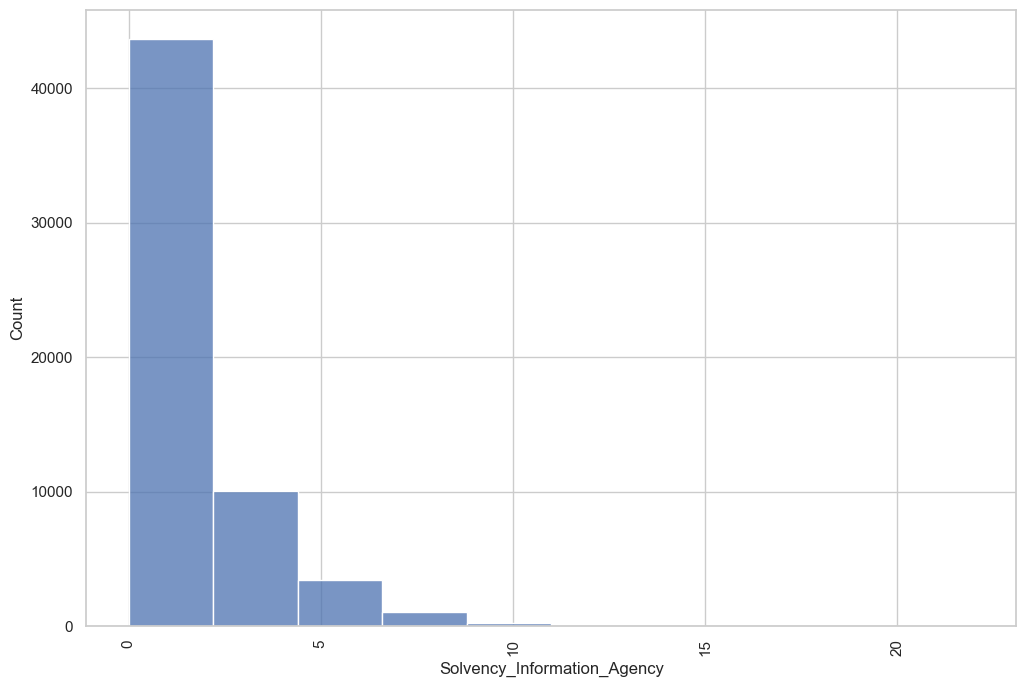

In [217]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(df['Solvency_Information_Agency'],  bins=10, ax=ax);


plt.xticks(rotation=90)
plt.show()

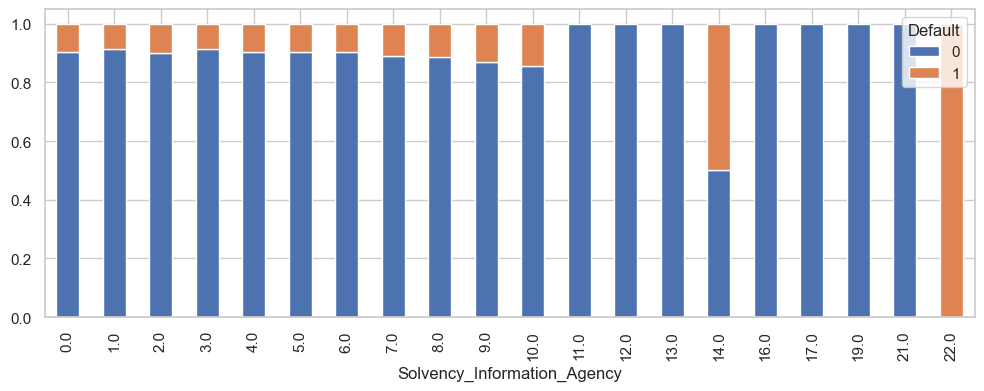

In [219]:
col_name=pd.crosstab(df["Solvency_Information_Agency"],df["Default"])
col_name.div(col_name.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(12,4))
plt.show()

In [ ]:
Removing all the null values from the entire table, now null values are very low


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58282 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Patron_Salary                          58282 non-null  float64
 1   Automobile_Possession                  56507 non-null  float64
 2   Two-Wheeler_Ownership                  56439 non-null  float64
 3   Ongoing_Borrowing                      56436 non-null  float64
 4   Residence_Proprietorship               56417 non-null  float64
 5   Offspring_Number                       58282 non-null  float64
 6   Loan_Capital                           58282 non-null  float64
 7   Borrowing_Periodic_Payment             58282 non-null  float64
 8   Customer_Revenue_Category              58282 non-null  object 
 9   Patron_Academic_Qualification          56437 non-null  object 
 10  Customer_Conjugal_State                58282 non-null  object 
 11  Patron

In [221]:
df = df.dropna()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47115 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Patron_Salary                          47115 non-null  float64
 1   Automobile_Possession                  47115 non-null  float64
 2   Two-Wheeler_Ownership                  47115 non-null  float64
 3   Ongoing_Borrowing                      47115 non-null  float64
 4   Residence_Proprietorship               47115 non-null  float64
 5   Offspring_Number                       47115 non-null  float64
 6   Loan_Capital                           47115 non-null  float64
 7   Borrowing_Periodic_Payment             47115 non-null  float64
 8   Customer_Revenue_Category              47115 non-null  object 
 9   Patron_Academic_Qualification          47115 non-null  object 
 10  Customer_Conjugal_State                47115 non-null  object 
 11  Patron

In [228]:
def cat_encode(col_name):
    df[col_name] = pd.Categorical(df[col_name], categories=np.unique(df[col_name])).codes

In [229]:
cat_encode('Customer_Revenue_Category')
cat_encode('Patron_Academic_Qualification')

cat_encode('Sort_of_Institution')
cat_encode('Patron_Sex')
cat_encode('Borrowing_Agreement_Category')
cat_encode('Customer_Living_Arrangement')
cat_encode('Customer_Conjugal_State')

In [232]:
df2 = df.corr(numeric_only = True)

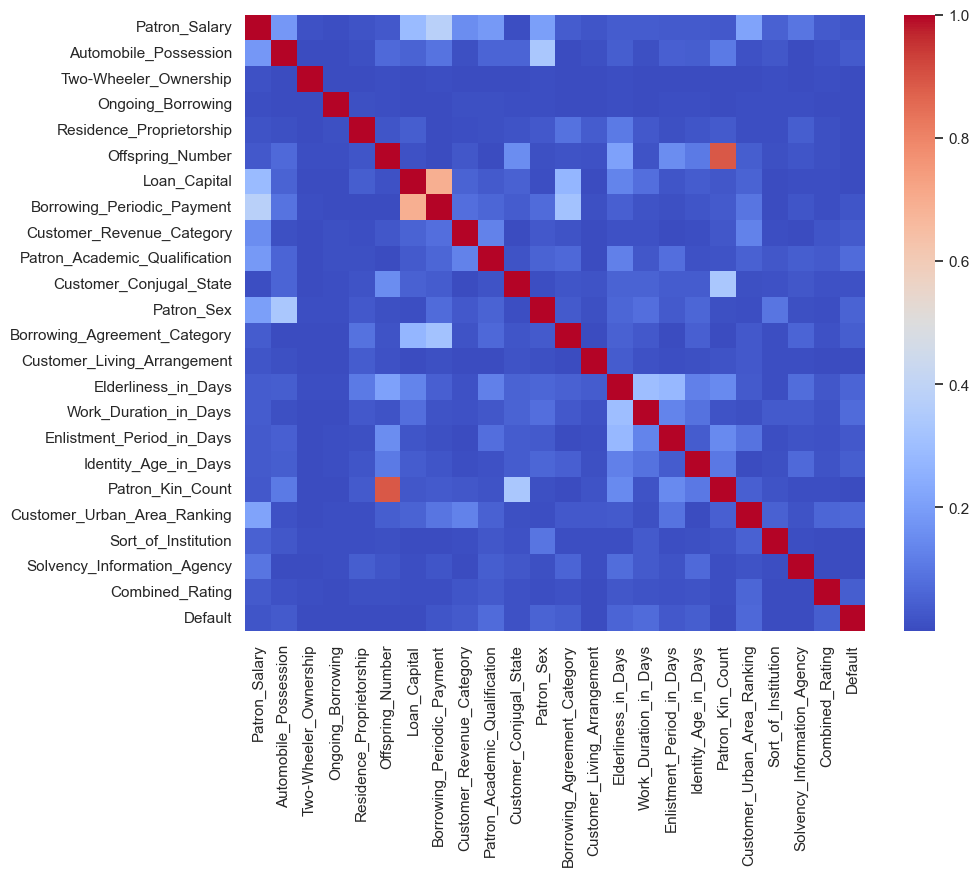

In [233]:
plt.figure(figsize = (10, 8))
dataplot = sns.heatmap(df2.abs(),annot=False, cmap="coolwarm") 

plt.show() 

In [237]:
df2['Default'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,Default,1.000000
1,Patron_Academic_Qualification,0.072345
2,Customer_Urban_Area_Ranking,0.065325
3,Customer_Revenue_Category,0.033473
4,Borrowing_Periodic_Payment,0.019901
5,Customer_Conjugal_State,0.014081
6,Ongoing_Borrowing,0.003438
7,Customer_Living_Arrangement,0.003280
8,Offspring_Number,0.003154
9,Solvency_Information_Agency,0.002539


In [238]:
# fing=ding highly corelated

In [240]:
new_corr = df2.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [242]:
new_corr[new_corr.correlation > 0.3]

,level_0,level_1,correlation
437,Patron_Kin_Count,Offspring_Number,0.888763
174,Borrowing_Periodic_Payment,Loan_Capital,0.694739
168,Borrowing_Periodic_Payment,Patron_Salary,0.377193
265,Patron_Sex,Automobile_Possession,0.335224
442,Patron_Kin_Count,Customer_Conjugal_State,0.334792
295,Borrowing_Agreement_Category,Borrowing_Periodic_Payment,0.313129


In [245]:
df['Patron_Constant_Correspondence_Marker'] = df['Patron_Constant_Correspondence_Marker'].map({'Yes': 1, 'No': 0}).astype(float)

In [246]:
df.to_csv("CleanData.csv")